In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import defaultdict

In [19]:
def plt_results(folder, length=100, title=''):
    results = defaultdict(list)
    for i in range(1, length + 1):
        df = pd.read_csv(folder + 'results' + str(i) + '.csv')
        results[i] = df['total_reward']

    plt.figure(figsize=(15,6))
    plt.title(title)
    mean = []
    std_min = []
    std_max = []
    maxi = []
    for i in range(1, length + 1):
        mean.append(np.mean(results[i]))
        std_min.append(np.mean(results[i]) - np.std(results[i]))
        std_max.append(np.mean(results[i]) + np.std(results[i]))
        maxi.append(np.max(results[i]))
    plt.plot(mean, label='mean')
#    plt.plot(std_min, color='g')
#    plt.plot(std_max, color='g')
    plt.plot(maxi, color='r', label='best')

########################################
# Red  : best reward
# Blue : mean reward
# Green: mean reward for random policy
########################################


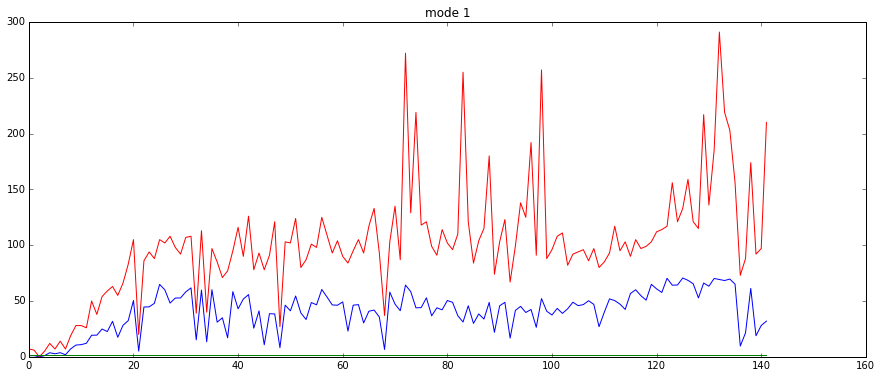

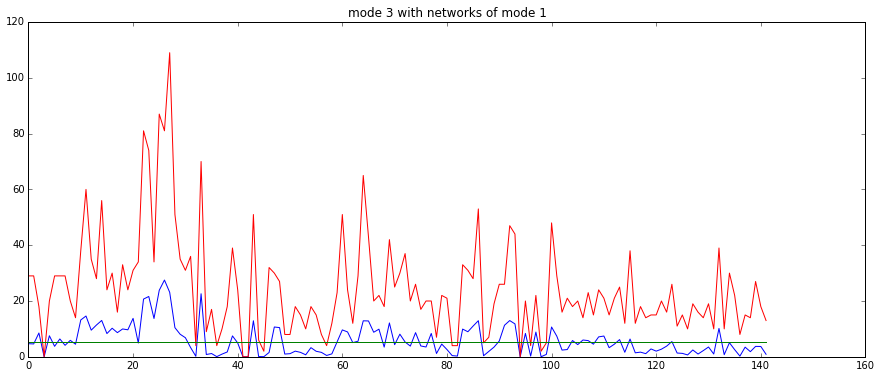

In [20]:
print('#' * 40)
print('# Red  : best reward\n# Blue : mean reward\n# Green: mean reward for random policy')
print('#' * 40)
plt_results('breakout_super_test_mode_1_on_mode_1/', length=142, title='mode 1')
plt.plot([1.235 for _ in range(1, 143)])
plt_results('breakout_super_test_mode_3_on_mode_1/', length=142, title='mode 3 with networks of mode 1')
plt.plot([5.35 for _ in range(1, 143)])

########################################
# Red  : best reward
# Blue : mean reward
# Green: mean reward for random policy
########################################


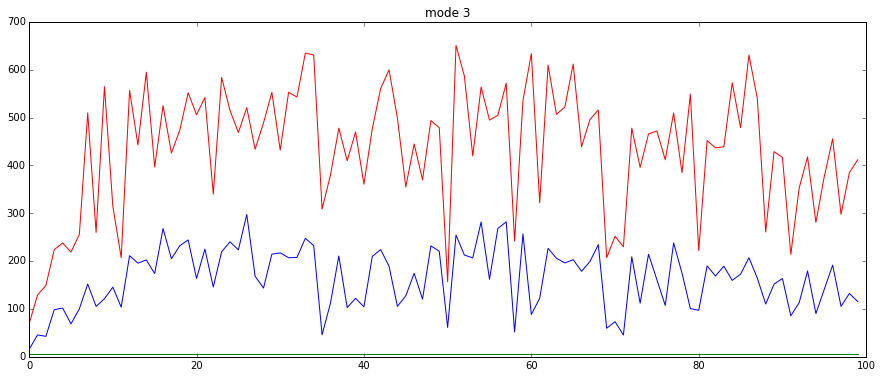

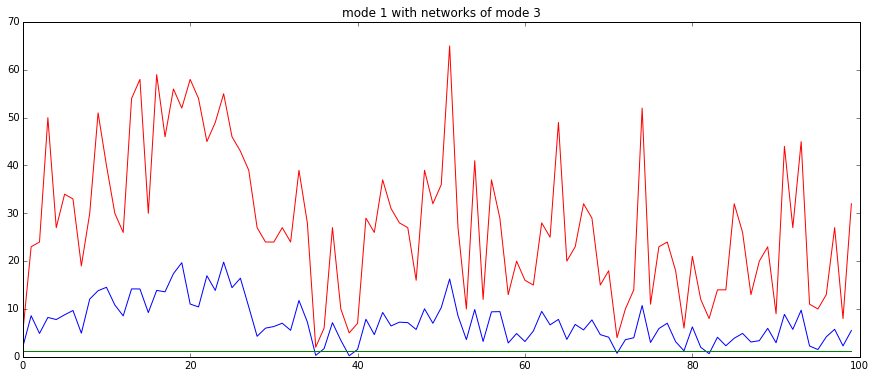

In [21]:
print('#' * 40)
print('# Red  : best reward\n# Blue : mean reward\n# Green: mean reward for random policy')
print('#' * 40)
plt_results('breakout_super_test_mode_3_on_mode_3/', 100, 'mode 3')
plt.plot([5.35 for _ in range(1, 101)])
plt_results('breakout_super_test_mode_1_on_mode_3/', 100, 'mode 1 with networks of mode 3')
plt.plot([1.235 for _ in range(1, 101)])

## Results for a random agent

In [ ]:
df_random = pd.read_csv('random_results.csv')
for mode in [1, 3, 5, 7, 8]:
    print('mode', mode, '- mean reward', df_random[df_random['mode'] == mode]['reward'].mean())
    plt.figure()
    plt.title('Random results for mode ' + str(mode))
    df_random[df_random['mode'] == mode]['reward'].hist(bins=df_random[df_random['mode'] == mode]['reward'].max())